In [2]:
import tensorflow as tf
import numpy as np
mnist_train, (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = mnist_train[0][:50000]
y_train = mnist_train[1][:50000]
x_validate = mnist_train[0][50000:]
y_validate = mnist_train[1][50000:]

The mnist data set we're downloading is already split into training and testing data. However, we're going to be trying out lots of different networks, so to avoid overfitting to the test set, we'll tune the architecture and other hyperparemeters on the validation set, and only run on the test set once we've finalized the network.

In [3]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_validate shape:", x_validate.shape)
print("Y_validate shape:", y_validate.shape)
print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (50000, 28, 28)
Y_train shape: (50000,)
X_validate shape: (10000, 28, 28)
Y_validate shape: (10000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


Normally, this sort of data split should be done randomly, but in this case, the data set we've downloaded was already appropriately shuffled. We should still verify that the test/validate/train sets all have roughly balanced label classes.

In [4]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_validate))
print(Counter(y_test))

Counter({1: 5678, 7: 5175, 3: 5101, 9: 4988, 2: 4968, 6: 4951, 0: 4932, 4: 4859, 8: 4842, 5: 4506})
Counter({7: 1090, 1: 1064, 3: 1030, 8: 1009, 0: 991, 2: 990, 4: 983, 6: 967, 9: 961, 5: 915})
Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's take a look at a random data point (you can re-run this cell as many times as you like):

training point index: 43415
label: 4


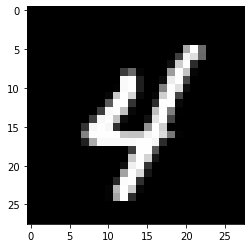

In [6]:
index = np.random.randint(x_train.shape[0])
print("training point index:", index)
print("label:", y_train[index])
plt.imshow(x_train[index], cmap='gray')
plt.show()

In this data set, the X values (the grayscale images) are 28x28 arrays of integers between 0 and 255, and Y values are integers between 0 and 9. We need to normalize the X values, and encode the Y-values. An easy way to do normalization, given that we know the range of the data, is to simply rescale to the range \[0,1\] by dividing by 255. For encoding the Y values, there's a handy Keras function: to_categorical. We could also flatten the 28x28 input arrays into 784-vectors, but there's a layer we can add to the network that will do this for us.

In [7]:
x_train_norm = x_train / 255
x_validate_norm = x_validate / 255
x_test_norm = x_test / 255

y_train_vec = tf.keras.utils.to_categorical(y_train)
y_validate_vec = tf.keras.utils.to_categorical(y_validate)
y_test_vec = tf.keras.utils.to_categorical(y_test)

Let's import sum handy tensorflow sub-libraries. They're documented here: https://keras.io/api/layers/.

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

Create a simple neural network. It has:
* zero hidden layers
* dense inter-layer connections
* sigmoid activation functions
* mean squared error loss
* stochastic gradient descent optimizer

You should try playing around with these parameters to improve it.

In [9]:
neural_net = tf.keras.Sequential()
neural_net.add(layers.Flatten(input_shape=(28, 28, 1))) # non-trainable; converts a 28x28 matrix into a 784-vector.
neural_net.add(layers.Dense(64, activation="relu"))
neural_net.add(layers.Dense(64, activation="relu"))
neural_net.add(layers.Dense(10, activation="linear"))
neural_net.compile(loss=losses.MeanSquaredError(), optimizer=optimizers.Adam(learning_rate=0.001), metrics=[metrics.CategoricalAccuracy()])
neural_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


We pass a few more parameters when we call fit:
* batch_size
* epochs

Feel free to change these as well.

In [10]:
neural_net.fit(x_train_norm, y_train_vec, batch_size=50, epochs=10, validation_data=(x_validate_norm, y_validate_vec))
validation_set_predictions = neural_net.predict(x_validate_norm)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0249 - categorical_accuracy: 0.8930 - val_loss: 0.0130 - val_categorical_accuracy: 0.9513
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0111 - categorical_accuracy: 0.9550 - val_loss: 0.0089 - val_categorical_accuracy: 0.9630
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0081 - categorical_accuracy: 0.9657 - val_loss: 0.0073 - val_categorical_accuracy: 0.9670
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0065 - categorical_accuracy: 0.9727 - val_loss: 0.0065 - val_categorical_accuracy: 0.9691
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0054 - categorical_accuracy: 0.9764 - val_loss: 0.0058 - val_categorical_accuracy: 0.9707
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0047 - categorical_accuracy: 0.9789 - val_loss: 0.0055 - val_categorical_accuracy:

With the default parameters, it should get ~85% accuracy.
See how much better you can do.
Even with  a densely connected network (you should stick to Dense layers for now), accuracy above 97% should be quite achievable.

You can also see how the network labeled random outputs:

validation point index: 5742
predicted label: 6
true label: 6


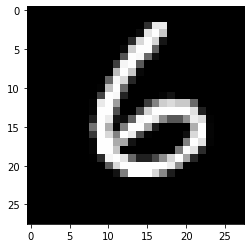

In [11]:
index = np.random.randint(x_validate.shape[0])
print("validation point index:", index)
print("predicted label:", validation_set_predictions[index].argmax())
print("true label:", y_validate[index])
plt.imshow(x_validate[index], cmap='gray')
plt.show()

In [12]:
accuracy = tf.keras.metrics.CategoricalAccuracy()
accuracy.update_state(y_validate_vec, validation_set_predictions)
accuracy.result().numpy()

0.9724

In [13]:
y_validate_vec
print(validation_set_predictions.shape)
np.argmax(validation_set_predictions, axis = 1)

(10000, 10)


array([3, 8, 6, ..., 5, 6, 8])

In [14]:
test_set_predictions = neural_net.predict(x_test_norm)
accuracy.update_state(y_test_vec, test_set_predictions)
accuracy.result().numpy()

0.9724

Because both the validation accuracy and the test accuracy are approximately equal, we say the model generalizes well to new data and does not overfit to the data.